In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
print(df.shape)
df.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.duplicated().sum()

0

In [5]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [6]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [7]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [9]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
df = pd.get_dummies(df,drop_first=True)

In [11]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [12]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [14]:
X_train.shape

(8000, 11)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [16]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [17]:
from keras.models import Sequential
from keras.layers import Dense

In [18]:
model = Sequential()
model.add(Dense(11,activation='relu', input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [19]:
 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
history = model.fit(X_train_scaled,y_train,epochs=50,validation_split=0.2)

Epoch 1/50


200/200 [==============================] - 3s 6ms/step - loss: 0.5901 - accuracy: 0.7050 - val_loss: 0.4939 - val_accuracy: 0.7975
Epoch 2/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4751 - accuracy: 0.7972 - val_loss: 0.4521 - val_accuracy: 0.7994
Epoch 3/50
200/200 [==============================] - 2s 12ms/step - loss: 0.4443 - accuracy: 0.8002 - val_loss: 0.4369 - val_accuracy: 0.8087
Epoch 4/50
200/200 [==============================] - 2s 8ms/step - loss: 0.4321 - accuracy: 0.8108 - val_loss: 0.4310 - val_accuracy: 0.8125
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4255 - accuracy: 0.8163 - val_loss: 0.4271 - val_accuracy: 0.8175
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4207 - accuracy: 0.8202 - val_loss: 0.4234 - val_accuracy: 0.8175
Epoch 7/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4163 - accuracy: 0.8223 - val_loss: 0.4192 - val_accuracy: 0.8219
Epo

In [22]:
model.layers[1].get_weights()

[array([[ 3.65036130e-01, -6.75733447e-01, -3.96716923e-01,
          3.52304816e-01, -5.23260176e-01,  6.74622118e-01,
         -2.38568082e-01,  3.19823593e-01,  2.20293611e-01,
         -3.11566651e-01,  6.78717911e-01],
        [-3.10359716e-01,  5.80860317e-01,  4.98514622e-01,
          6.24835670e-01,  5.88068187e-01, -2.85847098e-01,
          7.62667954e-02, -6.22115359e-02, -7.88642347e-01,
         -4.20149744e-01, -3.31038922e-01],
        [ 1.56508788e-01, -4.72600639e-01,  3.38973612e-01,
          8.16272050e-02,  2.31056780e-01,  3.14769059e-01,
         -5.16341567e-01, -8.16848278e-01,  2.63084710e-01,
          8.86702165e-02,  5.15341580e-01],
        [-2.06857979e-01, -1.59287348e-01,  1.23357713e-01,
         -4.59619910e-01,  3.46258998e-01,  3.47595811e-01,
         -3.85270745e-01, -1.47293791e-01,  7.51451850e-01,
          1.82518184e-01,  3.80710274e-01],
        [ 2.75784701e-01,  8.35077345e-01,  3.29362273e-01,
          3.06160510e-01,  4.83080596e-01,  

In [23]:
y_log = model.predict(X_test_scaled)
y_log

63/63 [==============================] - 0s 2ms/step


array([[0.03107354],
       [0.08646645],
       [0.03927982],
       ...,
       [0.00542518],
       [0.04534472],
       [0.41230562]], dtype=float32)

In [24]:
y_pred = np.where(y_log>0.5,1,0)
(y_pred==0).sum()

1766

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8615

In [26]:
import matplotlib.pyplot as plt

In [27]:
history.history

{'loss': [0.5901286602020264,
  0.47509169578552246,
  0.4443424642086029,
  0.43209534883499146,
  0.42548617720603943,
  0.4206932485103607,
  0.4162681996822357,
  0.41105160117149353,
  0.40407589077949524,
  0.3958193063735962,
  0.386272132396698,
  0.3767666220664978,
  0.3672651946544647,
  0.3590485453605652,
  0.3536485433578491,
  0.35027173161506653,
  0.3474511206150055,
  0.3452144265174866,
  0.34388190507888794,
  0.34209153056144714,
  0.3416772782802582,
  0.3413326144218445,
  0.34011539816856384,
  0.33876436948776245,
  0.3382413983345032,
  0.33792659640312195,
  0.33752861618995667,
  0.33662500977516174,
  0.33612293004989624,
  0.3355541527271271,
  0.3350454568862915,
  0.3342444598674774,
  0.3336617946624756,
  0.33335694670677185,
  0.33257630467414856,
  0.33261677622795105,
  0.3318067193031311,
  0.3310467600822449,
  0.33016207814216614,
  0.3309038281440735,
  0.3294808566570282,
  0.3300551474094391,
  0.3293881118297577,
  0.3293236196041107,
  0.328

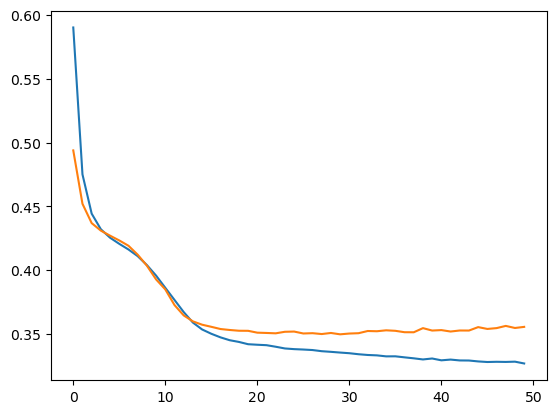

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

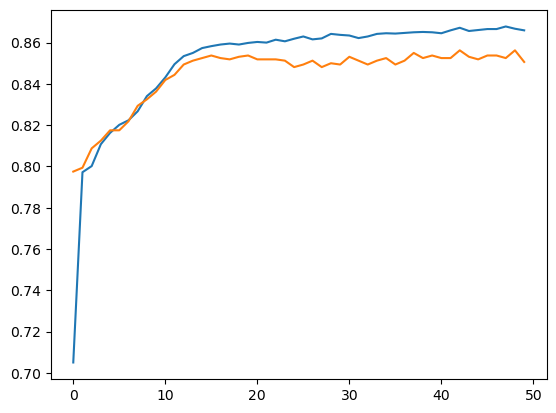

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])